In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import random
import seaborn as sns

In [2]:
data = fetch_openml('letter', version=1, as_frame=True)
X, y = data.data, data.target

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
kernel_options = ['linear', 'rbf', 'poly', 'sigmoid']
nu_values = np.linspace(0.1, 1.0, 10)
epsilon_values = np.linspace(0.01, 0.5, 10)

In [5]:
results = []
convergence_data = {}

In [8]:
for sample in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=sample)

    best_acc = 0
    best_params = {}
    acc_list = []

    for iteration in range(20):  # Reduced for speed
        kernel = random.choice(kernel_options)
        nu = random.choice(nu_values)
        epsilon = random.choice(epsilon_values)  # Just for display

        clf = svm.NuSVC(kernel=kernel, nu=nu)
        try:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            acc_list.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = {
                    'kernel': kernel,
                    'nu': nu,
                    'epsilon': epsilon
                }
        except Exception:
            acc_list.append(0)
            continue

    results.append({
        'Sample #': f"S{sample+1}",
        'Best Accuracy': round(best_acc * 100, 2),
        'Best SVM Parameters': f"{best_params['kernel']}, {best_params['nu']:.2f}, {best_params['epsilon']:.2f}"
    })

    convergence_data[f"S{sample+1}"] = acc_list

In [9]:
results_df = pd.DataFrame(results)

# Display the results table
print("\nFinal Results:")
print(results_df)


Final Results:
   Sample #  Best Accuracy Best SVM Parameters
0        S1          94.62     rbf, 0.10, 0.23
1        S2          94.95     rbf, 0.10, 0.12
2        S3          95.35     rbf, 0.10, 0.23
3        S1          85.13     rbf, 0.40, 0.01
4        S2          85.02     rbf, 0.40, 0.17
5        S3          91.57     rbf, 0.20, 0.39
6        S4          87.50    poly, 0.30, 0.45
7        S1          91.17    poly, 0.20, 0.45
8        S2          91.30     rbf, 0.20, 0.34
9        S3          91.57     rbf, 0.20, 0.17
10       S4          91.20     rbf, 0.20, 0.45
11       S5          94.80     rbf, 0.10, 0.12
12       S6          94.30    poly, 0.10, 0.17
13       S7          86.90     rbf, 0.30, 0.17
14       S8          90.50    poly, 0.20, 0.34
15       S9          90.97    poly, 0.20, 0.39
16      S10          94.90     rbf, 0.10, 0.23


In [10]:
results_df.to_csv("svm_results.csv", index=False)

In [11]:
best_sample_index = results_df['Best Accuracy'].idxmax()
best_sample_id = results_df.loc[best_sample_index, 'Sample #']
best_acc_list = convergence_data[best_sample_id]

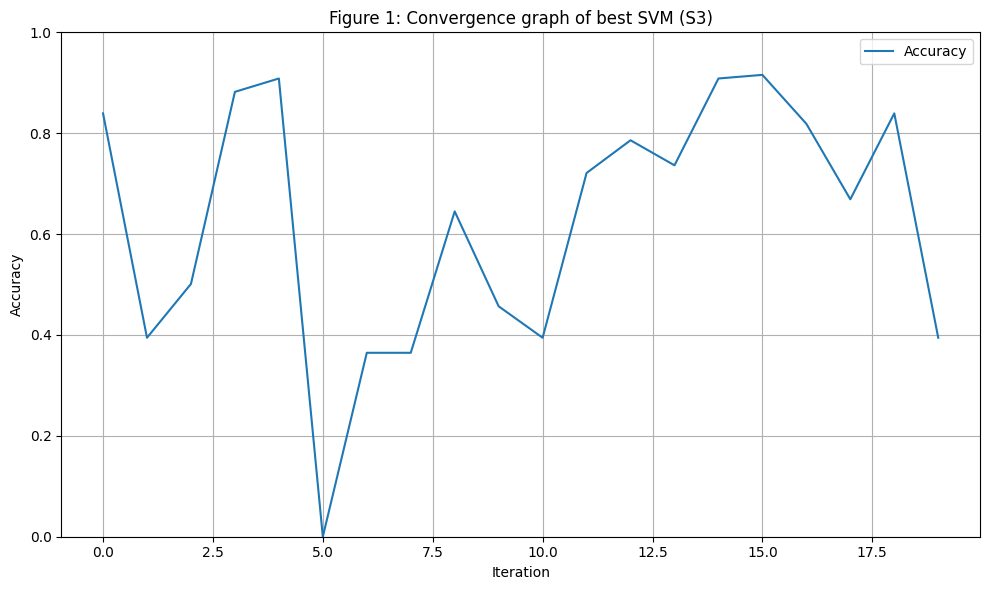

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(best_acc_list, label='Accuracy')
plt.title(f"Figure 1: Convergence graph of best SVM ({best_sample_id})")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("convergence_plot.png")
plt.show()